# Machine Learning Overview

<img src="https://artificialintelligence.oodles.io/wp-content/uploads/2019/11/Traditional-Programming.jpg" width="600">

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Introduction

Gradient descent is a technique that helps us set the correct values for neural network parameters.  Without gradient descent, networks wouldn't be able to learn how to make predictions from data.  In this notebook, we'll learn about gradient descent by using it to train a linear regression model.

Linear regression is a popular supervised machine learning algorithm that predicts a target given some input variables called features.  We'll use linear regression to predict tomorrow's temperature using historical data:

In [2]:
# Read in the data
df = pd.read_csv("/kaggle/input/clean-weather-dataset/clean_weather.csv", index_col=0)

# Fill in any missing values in the data with past values
df = df.ffill()

# Show the first 5 rows of the data
df.head(5)


,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0


# Linear Regression Intuition

In our data, each row is a different day, and the columns are different weather observations associated with that day.  We have data from `1970` to the present.

Using the data above, we could predict `tmax_tomorrow` based on today's max temperature (`tmax`), today's min temperature (`tmin`), and how much it rained today (`rain`).

Linear regression requires a linear relationship between the features and the target. We can visualize this with a scatter plot:

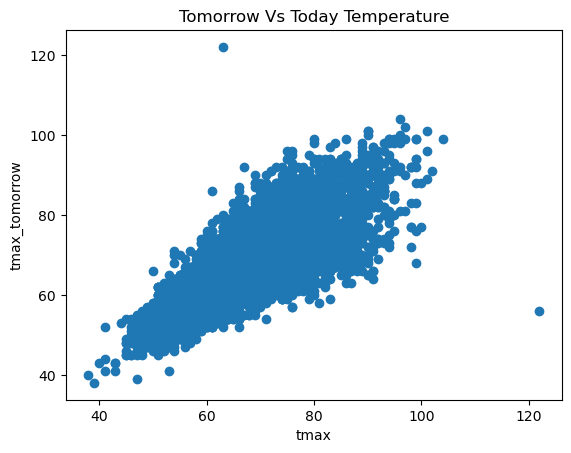

In [3]:
plt.scatter(df.tmax, df.tmax_tomorrow)
plt.xlabel('tmax')
plt.ylabel('tmax_tomorrow')
plt.title("Tomorrow Vs Today Temperature")
plt.show()

As you can see above, `tmax` and `tmax_tomorrow` have a linear relationship - when `tmax` increases, `tmax_tomorrow` usually does as well.

Intuitively, if we drew a line through the center of the cloud of points, we could use that line to predict `tmax_tomorrow` from `tmax`.  Since `tmax` is linearly related to `tmax_tomorrow`, the line will tell us what number to multiply `tmax` by to get a prediction for`tmax_tomorrow`. Below, red line is multiplying `tmax` by `1` to get our predicted `tmax_tomorrow`, thus `tmax = tmax_tmorrow`




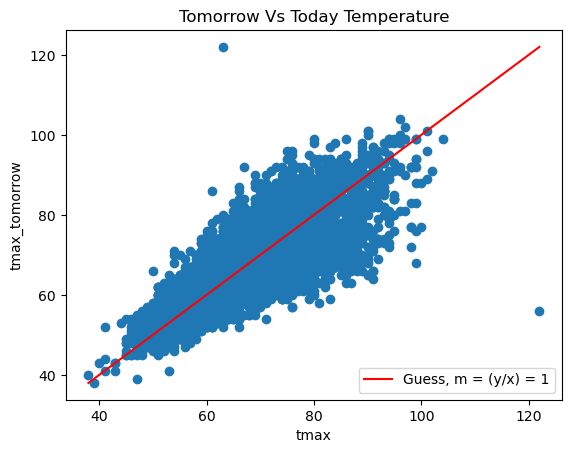

In [4]:
# Plotting scatter plot
plt.scatter(df.tmax, df.tmax_tomorrow)
plt.xlabel('tmax')
plt.ylabel('tmax_tomorrow')
plt.title("Tomorrow Vs Today Temperature")

# Adding a reference line with slope 1
x = [df.tmax.min(), df.tmax.max()]
y = x
plt.plot(x, y, color='red', label='Guess, m = (y/x) = 1')
plt.legend();

# Uncomment the lines below to set custom limits for x and y axes
# plt.xlim([0, 120]);
# plt.ylim([0, 120]);

plt.show()


# Cost Function

> It provides feedback on how **accurate** the **predictions** are by comparing them with the **actual answers** kind of our **Exams**. In a nutshell, it calcualtes `error` in the prediction.

Using the equation, we can calculate our how accurate is our prediction if `tmax_tomorrow = tmax`. With linear regression, it's common to use squared error.  We calculate it using the formula 

$$\operatorname{MSE}=\frac{1}{N}\sum_{i=1}^{N}(\hat{y} - y) ^ 2$$

Here
* $\hat{y}$ = prediction
* $y$ = actual answer (ground truth)


In [5]:
def cost_fn(y, y_hat):
    mse = (y - y_hat)**2
    mse_mean = np.mean(mse) # average mse 
    return mse_mean

# Error for Initial Guess
We'll compute cost or error for our intial guess `tmax_tomorrow = tmax` aka $(m = w = 1)$.

In [6]:
score = cost_fn(df.tmax_tomorrow, df.tmax)
print(f'MSE (m=1): {score:0.2f}')

MSE (m=1): 25.17


# Linear Regression using Machine Learning
Below, we're going to use a Machine Learning approach to create a **Linear Regression Model**. By feeding it our input data and corresponding results, the model will learn how to predict tomorrow's maximum temperature (`tmax_tomorrow`) based on today's maximum temperature (`tmax`). To do this, we'll use the `Scikit-Learn` library.

Weight (w): 0.82
Bias (b): 11.99


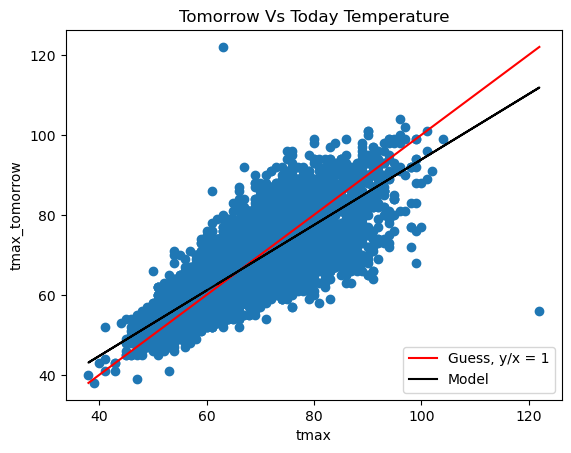

In [7]:
from sklearn.linear_model import LinearRegression

# Build a linear regression model
lr = LinearRegression()

# Train/Fit the model, this where magic happens 🪄
lr.fit(df[["tmax"]], df["tmax_tomorrow"])

# Found weights and bias
print(f"Weight (w): {lr.coef_[0]:.2f}")
print(f"Bias (b): {lr.intercept_:.2f}")

# Plot our data points and the regression line
plt.scatter(df.tmax, df.tmax_tomorrow)
plt.xlabel('tmax')
plt.ylabel('tmax_tomorrow')
plt.title("Tomorrow Vs Today Temperature")

# Plot for tmax_tomorrow = tmax
x = [df.tmax.min(), df.tmax.max()]
y = x
plt.plot(x, y, color='red', label='Guess, y/x = 1')

# Plot result of Linear Regression Model
x = df['tmax']
y_hat = lr.predict(df[["tmax"]])
plt.plot(x, y_hat, 'k', label='Model')
plt.legend()

# Uncomment the lines below to set custom limits for x and y axes
# plt.xlim([0, 120])
# plt.ylim([0, 120])

plt.show()


# Error for Model

In [8]:
y = df['tmax']
y_hat = lr.predict(df[["tmax"]])  # predicted tmax_tomorrow

# Calculate Mean Squared Error (MSE)
score = cost_fn(y, y_hat)

print(f'MSE (Model): {score:0.2f}')

MSE (Model): 2.28


# Linear Regression Model

Linear regression works in a similar way - it learns the correct values to multiply the features by to get the target.  The equation for this looks like:

$$\hat{y}= (\sum_{i=1}^{3} w_{i}x_{i} + b) = w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} + b$$

- $\hat{y}$ is our prediction for `tmax_tomorrow`.
- $x_{1}$, $x_{2}$, and $x_{3}$ are the features that we're using to predict the target (in this case, `tmax`, `tmin`, and `rain`).  If we had more features, we would add more x values to our equation.
- The $w$ values are the weight parameters that the linear regression algorithm learns.  The weights are what we multiply the $x$ values by to get the predicted $\hat{y}$ value.
- $b$ is a value called the bias (or y-intercept).  This enables us to "shift" the prediction line up or down to match the data.

> But we don't know the value of $w_i$ & $b_i$ !!!

## Q. How to find Weights ($w_i$) & Biases ($b$) using Features ($x_i$) ???
Ans. Weights and biases can be found using **<span style="color:red;">Gradient Descent</span>** (🔥 Secret sauce of Machine Learning)

* `Gradient Descent` is an **iterative optimization algorithm** that adjusts variables to minimize a cost function.
* The `gradient` represents the **slope** or rate of change of the **cost function** **with respect to the variables** ($\frac{\partial L}{\partial w_i}, \frac{\partial L}{\partial b}$).
* By following the `negative gradient` direction, Gradient Descent **gradually reduces the cost function**.
* Through `iterative updates`, Gradient Descent converges towards optimal values for the variables, such as weights and biases, achieving the best fit for the given features.

> In the case of the linear regression $\hat{y}= (\sum_{i=1}^{3} w_{i}x_{i} + b)$, Gradient Descent adjusts the weights ($w_i$) and biases ($b$) to minimize the cost, typically the mean squared error (MSE).


In the animation below, we visualize the process of Iterative Gradient Descent. The x and y axes represent two features, while the z-axis represents the loss or cost. 

<img src="https://miro.medium.com/v2/resize:fit:1024/1*S3oLN40uWnGmP63lOFEDUg.gif">

# Linear Regression Model from Scratch
Let's simplify the problem. In **Linear Regression Equation** $y = w*x + b$, suppose the bias value is known ($b = 11.99$), and our task is to find the value of $w$. For simplicity, let's focus on finding $w$ for a single sample, where $x = 80$. So, we can rewrite the equation as follows:

$$
\begin{align*}
  y &= w * x + b \\
    &= w * 80 + 11.99 \\
\end{align*}
$$

To start Gradient Descent, let's consider an initial guess of $w = 1$ (**<span style="color:cyan;">Step 1: Intialization of variables</span>**), which implies that `tmax_tomorrow = tmax`. Now, our goal is to find the value of $w$ that minimizes the Cost Function (MSE).

Next, we will examine how the loss/cost changes with respect to the weight ($w$)

<!-- Our predictions for `tmax_tomorrow` will be $\hat{y}= (0.82 * \text{tmax} + 11.99)$.  Now let's learn how to build our own linear regression algorithm.

# Calculating Loss

Earlier, I mentioned that we'd train our linear regression algorithm using gradient descent.  To make gradient descent work, we first need to calculate our loss.

Let's say today's `tmax` is `80`.  Using the equation, we can calculate our predicted `tmax_tomorrow` to be `77.59`. Then we can calculate our loss.  Loss is a measure of the difference between the actual values and our predictions.  With linear regression, it's common to use squared error.  We calculate it using the formula 

$$\operatorname{MSE}=(\hat{y} - y) ^ 2$$

If the actual `tmax_tomorrow` is `81`, then $y=81$ and our loss is $(77.59 - 81) ^ 2$, which equals `11.63`.

Our parameters (weight and bias) led to this loss value.  If we change the weight, our loss will also change.  Let's visualize what it would look like if our weight value was `1`.
 -->

Text(0.5, 1.0, 'Loss Vs Weight')

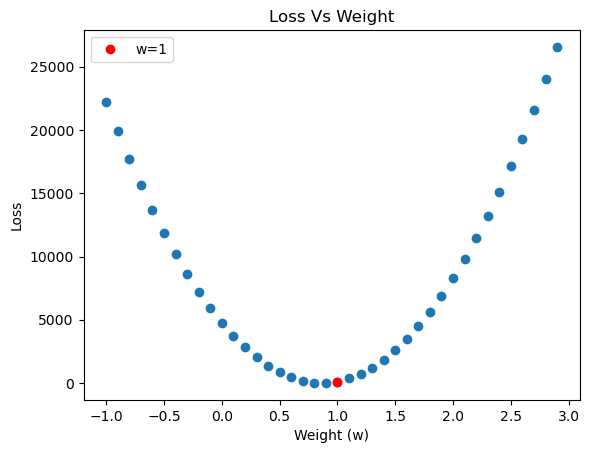

In [9]:
# Function to calculate the loss when tmax = x = 80
loss = lambda w, y: ((w * 80 + 11.99) - y) ** 2  # as for one sample no mean

# Actual temperature tomorrow
y = 81  # one specific sample

# Calculate loss values for several weights
ws = np.arange(-1, 3, 0.1)
losses = loss(ws, y)

# Plot the weight and losses
plt.scatter(ws, losses)

# Plot for w=1 and the corresponding loss
plt.plot(1, loss(1, y), 'ro', label='w=1')

plt.xlabel('Weight (w)')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss Vs Weight")

In the plot above, we've graphed the weight values on the x-axis, and the corresponding losses on the y-axis.  As you can see, there is a value at the bottom of the graph where loss is the lowest.  Loss increases if the weight is higher or lower than that value.  This is called the **global minimum**, and it's our goal to reach this value.

We've marked our weight value of `1` in red.  It's close to the global minimum, but not quite there.  This is where gradient descent comes into play - **it helps us adjust our parameters to reduce loss**.

First, we generate prediction of `tmax_tomorrow` when the weight is `1` (**<span style="color:cyan;">Step 2: Forward pass</span>**),
$$
\begin{align*}
  y &= w * x + b \\
    &= 1 * 80 + 11.99\\
    &= 91.99\\
\end{align*}
$$

Then we compute the cost/loss for the prediction (**<span style="color:cyan;">Step 3: Compute loss</span>**),
$$
\begin{align*}
  L &= (y - \hat{y})^2 \\
    &= (81 - 91.99)^2\\
    &= 120.78\\
\end{align*}
$$

We then have to figure out which direction to adjust each variable using Gradient (**<span style="color:cyan;">Step 4: Compute gradient aka Back Propagation</span>**)

$$
grad_t = \nabla L(\theta_t)
$$

Here,
* $\theta_t$ represents the current value of the parameters at iteration $t$.
* $\nabla L(\theta_t)$ represents the gradient of the cost function JJ with respect to the parameters θtθt​, which indicates the direction of steepest descent.

Finally, update the variable using negative gradient (**<span style="color:cyan;">Step 5: Update varaibles</span>**),

$$
\theta_{t+1} = \theta_t - \alpha \times grad_t
$$
Here,
* $\theta_{t+1}$ represents the updated value of the parameters at iteration $t+1$.
* $\alpha$ is the learning rate, which determines the step size for each update.
* $grad_t$ is the gradient for variable $\theta_t$.

## Before Computing Gradient ($\nabla$)

To understand how we do this, let's first take a look at the operations we perform to get a prediction. We'll do so using computational graph which is a way to visualize all the steps that are involved in calculating an answer from an algorithm. Think of it like a flowchart where each step leads to the next one, and you can trace your path from the beginning to the end,

<!-- ![Operations](https://raw.githubusercontent.com/VikParuchuri/zero_to_gpt/master/explanations/images/linreg/gradient.svg) -->
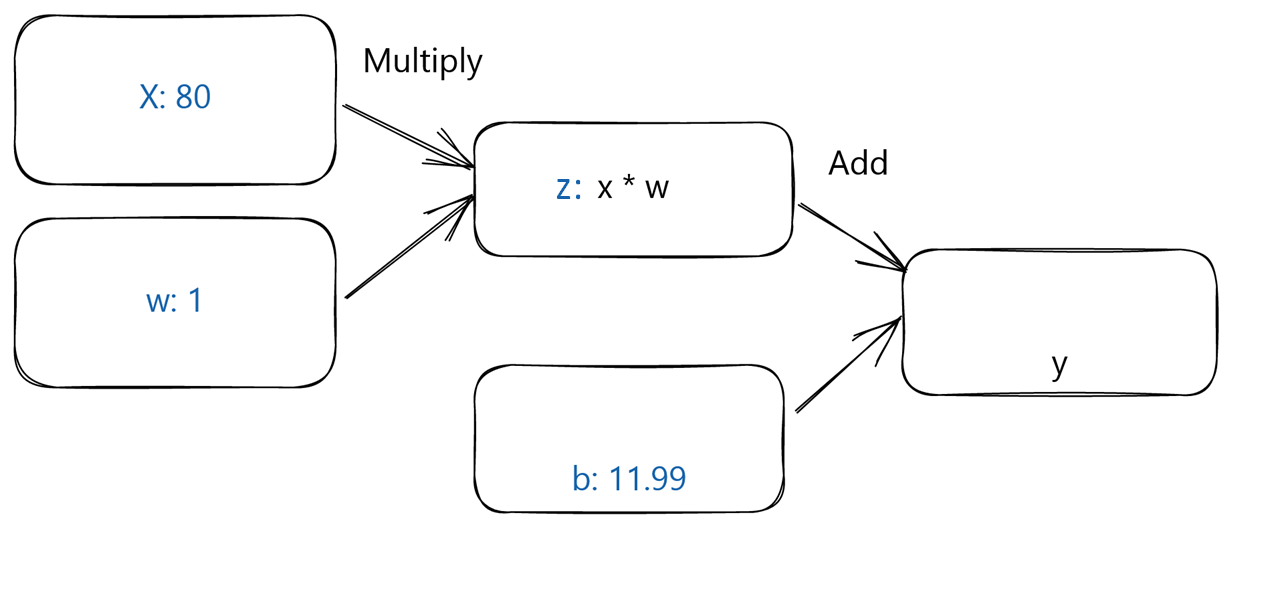

>  As you can see, we take our input data ($x$ = `tmax`), multiply it by the weight $w$ to create $z = w*x$ variable, then add the bias $b$ with it to get our prediction. For this Loss can be written as following,
$$
\begin{align*}
  L &= (\hat{y} - y) ^ 2 \\
    &= (w*x + b -y) ^ 2 \\
    &= (z + b - y) ^2
\end{align*}
$$

## Gradient for Bias ($\frac{\partial L}{\partial b}$).

The partial derivative with respect to the loss gradient tells us how much to adjust each parameter to lower the loss.  First, let's take the partial derivative with respect to $b$:

$$
\begin{align*}
\frac{\partial L}{\partial b} &= \frac{\partial\{(z + b - y)^2\}}{\partial b}\\
                              &= 2 * (z + b - {y}) * 1\\
                              &= 2 * (91.99 - 81)\\
                              &= 21.98
\end{align*}
$$

In the computational graph,

![B derivative](https://raw.githubusercontent.com/VikParuchuri/zero_to_gpt/master/explanations/images/linreg/b_deriv.svg)


## Gradient for Weight ($\frac{\partial L}{\partial w}$).

Next, we take the partial derivative with respect to $w$.  This is a little more complicated, since we multiply $w$ by $x$ to create $z$ variable, then add it to $b$ to get our prediction. We have to use the chain rule to find the derivative.  The chain rule says that the partial derivative of $a$ with respect to $c$ equals the partial derivative of $a$ with respect to $b$ times the partial derivative of $b$ with respect to $c$.

$$
\frac{{da}}{{dc}} = \frac{{da}}{{db}} \cdot \frac{{db}}{{dc}}
$$


Thus for our case gradient of Loss w.r.t weight is,
$$
\begin{align*}
\frac{\partial L}{\partial w} &= \frac{\partial\{(z + b - y)^2\}}{\partial w}\\
                              &= \frac{\partial \{(z + b - y)^2\}}{\partial (z)} \cdot \frac{\partial (z)}{\partial w}\\
                              &= 2 * (z + b - {y}) * \frac{\partial (x*w)}{\partial w}\\
                              &= 2 * (z + b - {y}) * x\\
                              &= 2 * (91.99 - 81) * 80\\
                              &= 1758.4
\end{align*}
$$



In computational graph,

![W derivative](https://raw.githubusercontent.com/VikParuchuri/zero_to_gpt/master/explanations/images/linreg/w_deriv.svg)

## Update Variable ($w$)
Let's update the weight of model using `negative` gradient means subtracting the gradient from its previous value,

$$
\begin{align*}
w_{t+1} &= w_t - \alpha \times \frac{\partial L}{\partial w}\\
        &= 1 - 1 \times 1758.4\\
        &= - 1757.4
\end{align*}
$$

After the weight update we get loss,
$$
\begin{align*}
L_{t+1} &= (\hat{y} - y)^2\\
  &= [(w_{t+1} * x + b) - 81]^2\\
  &= [(- 1757.4 * 80 + 11.99) - 81]^2\\
  &= 1.98 \times 10^{10} > L_t
\end{align*}
$$

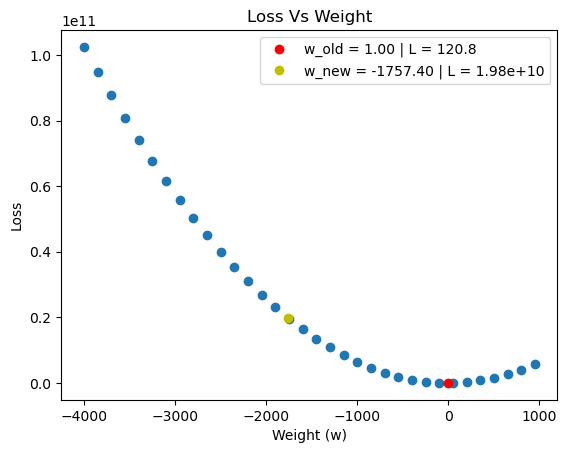

In [10]:
ws = np.arange(-4000, 1000, 150)
losses = loss(ws, y)

# Function to calculate the gradient
gradient = lambda w, y: ((w * 80 + 11.99) - y) * 2 * 80

# Plot the weight and losses
plt.scatter(ws, losses)
plt.xlabel('Weight (w)')
plt.ylabel('Loss')
plt.title("Loss Vs Weight")

# Original weight
plt.plot(1, loss(1, y), 'ro', label=f'w_old = {1:0.2f} | L = {loss(1, y):0.1f}')

# New weight
new_weight = 1 - gradient(1, y)
plt.plot(new_weight, loss(new_weight, y), 'yo', label=f'w_new = {new_weight:0.2f} | L = {loss(new_weight, y):0.2e}')

plt.legend()

## Q. What went wrong? Why loss increased after weight update? 🤔
A. Gradient Descent tells us which way to go for new weights which will minimize the loss/cost but it doesn't tell us how far to go. In other words, it gives us direction not the distance. Suppose you are in mountain and you can't see the entire path but you can see which way is down from where you are standing using Gradient Descent. But if you take a long step/distance you may end up in another moutain like **Hulk**.🤢

<img src="https://media.tenor.com/SEfINkOIDjIAAAAC/hulk-jump.gif">

## Learning Rate

In Machine Learning, the learning rate determines the size of adjustments made to the model's parameters during training. It controls how fast the model learns by influencing the updates to the weights or coefficients in each optimization iteration. Breifly,

* `down direction` $\rightarrow$ **gradient** ($\partial$)
* `size of steps` $\rightarrow$ **learning rate** ($\alpha$).

**High learning rate**: Now, if you take very large steps, you may step past the bottom of the hill and end up on another hill, resulting in a situation that's worse than where you started. This is similar to what happens when the learning rate is too high in machine learning: the model may skip the optimal solution and end up with a suboptimal solution, or worse, it may not converge to a solution at all.

**Low learning rate**: If you take very small steps, you might reach the bottom eventually but it could take a very long time. In machine learning, a low learning rate might mean that the model will take a lot of time to train, which might not be practical.
<!-- 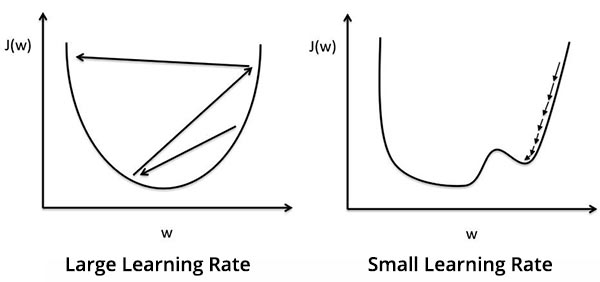 -->

<img src="https://gbhat.com/assets/gifs/sgd_learning_rates.gif" width="800">

> **Note**: The gradient at any point tells you which way is down from that point. But if you're taking large steps, the gradient could change quite a bit between your current position and your new position. So the assumption that the gradient will stay the same during your step might not be accurate, especially if the step is large.


## Update Variable ($w$) with Learning Rate ($\alpha$)
To adjust for this, we use a learning rate.  Instead of adjusting the weights and biases directly by the partial derivative, we multiply by the learning rate.  This enables us to take a smaller step, and stay in a region where the gradient doesn't change too much:

$$
\begin{align*}
w_{t+1} &= w_t - \alpha \times \frac{\partial L}{\partial w}\\
        &= 1 - 5 \times 10^{-5} \times 1758.4\\
        &= 0.91
\end{align*}
$$

After the weight update we get loss,
$$
\begin{align*}
L_{t+1} &= (\hat{y} - y)^2\\
  &= [(w_{t+1} * x + b) - 81]^2\\
  &= [(0.91 * 80 + 11.99) - 81]^2\\
  &= 15.7 < L_t
\end{align*}
$$

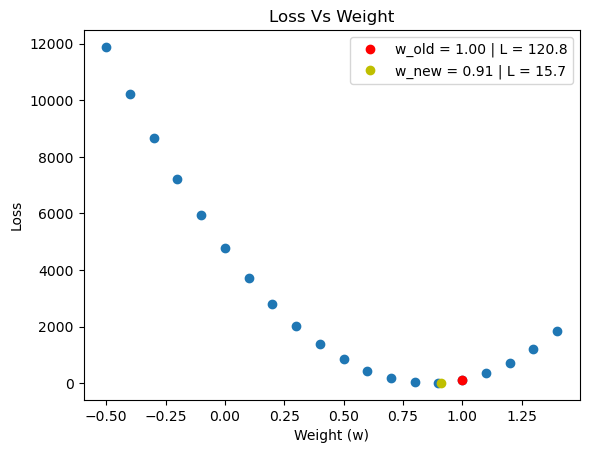

In [11]:
ws = np.arange(-.5,1.5,.1)
losses = loss(ws, y)

# Plot the weight and losses
plt.scatter(ws, losses)

# Original weight
plt.plot(1, loss(1, y), 'ro', label=f'w_old = {1:0.2f} | L = {loss(1, y):0.1f}')
# New weight with learning rate
lr = 5e-5
gradient_w = lambda w,y: 2 * ((w * 80 + 11.99) - y) * 80
new_weight = 1 - lr * gradient_w(1,y) # w' = w - lr * del_l/del_w
plt.plot(new_weight, loss(new_weight, y), 'yo', label=f'w_new = {new_weight:0.2f} | L = {loss(new_weight, y):0.1f}')

plt.xlabel('Weight (w)')
plt.ylabel('Loss')
plt.title("Loss Vs Weight");
plt.legend();

To get to the global minimum, we repeat gradient descent multiple times to "descend" to the correct weight and bias values.  The method looks like:

- Predict y using the current parameters
- Measure the gradient
- Update $w$ and $b$ using the partial derivative

We repeat until a local or global minimum, which has a gradient close to `0`.

Of course, in linear regression, we're looking at hundreds or thousands of rows, not just a single data point.  In this case, we loop through the entire data set, and do gradient descent on each row.  We then repeat this until the gradient averaged over the entire training set is close to 0.

We now know everything we need to get started implementing linear regression with gradient descent!

## 2nd Iteration
Let's repeat Steps [2-5] for 2nd iteration,

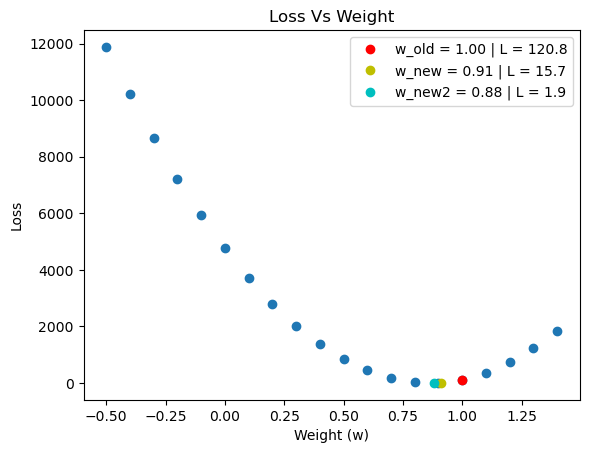

In [12]:
ws = np.arange(-.5,1.5,.1)
losses = loss(ws, y)

# Plot the weight and losses
plt.scatter(ws, losses)

# Original weight
plt.plot(1, loss(1, y), 'ro', label=f'w_old = {1:0.2f} | L = {loss(1, y):0.1f}')

# Weight from first iteration
plt.plot(new_weight, loss(new_weight, y), 'yo', label=f'w_new = {new_weight:0.2f} | L = {loss(new_weight, y):0.1f}')

# New weight from second iteration
lr = 5e-5
gradient_w = lambda w,y: 2 * ((w * 80 + 11.99) - y) * 80
w = 0.91
new_weight2 = w - lr * gradient_w(w,y) # w' = w - lr * del_l/del_w
plt.plot(new_weight2, loss(new_weight2, y), 'co', label=f'w_new2 = {new_weight2:0.2f} | L = {loss(new_weight2, y):0.1f}')

plt.xlabel('Weight (w)')
plt.ylabel('Loss')
plt.title("Loss Vs Weight");
plt.legend();

# Implementation for `Multivariable` & `All Samples`

Let's first load our data and split it into 3 sets:

- A training set, which we'll use to train our algorithm
- A validation set, which we'll use to measure error during training
- A test set, which we'll use to evaluate the model after it has been fit

Creating separate sets like this helps us avoid **overfitting**, where our model looks great in training, but doesn't work in the real world.

In [13]:
from sklearn.model_selection import train_test_split

FEATURES = ["tmax", "tmin", "rain"]
TARGET = ["tmax_tomorrow"]

# Ensure we get the same split every time
np.random.seed(0)

# Split data into train and evaluation sets
train_df, eval_df = train_test_split(df, test_size=0.3, random_state=0)

# Further split evaluation set into validation and test sets
valid_df, test_df = train_test_split(eval_df, test_size=0.5, random_state=0)

# Extract features and target variables for training set
train_x = train_df[FEATURES].values
train_y = train_df[TARGET].values

# Extract features and target variables for validation set
valid_x = valid_df[FEATURES].values
valid_y = valid_df[TARGET].values

# Extract features and target variables for test set
test_x = test_df[FEATURES].values
test_y = test_df[TARGET].values

print(train_x.shape, train_y.shape)

(9456, 3) (9456, 1)


To train a linear regression algorithm using gradient descent, we need 4 elements:

- A way to initialize our parameters (weights and biases)
- A `forward` pass that computes predictions using the parameters
- A loss function that measures the error of our predictions
- A `backward` pass that updates our parameters to reduce the loss

To initialize our weight parameters, we can use random initialization.  Random initialization helps the gradient descent algorithm descend to a global minimum efficiently (feel free to experiment with other initializations, like 0 or 1 to see what happens).

It's common to initialize the bias to be `1` or `0`.

We'll shrink the initial parameter values so we don't end up with predictions that are too large (this can cause gradient descent to take steps that are too large).

In [14]:
import math

def init_params(features):
    # Initialize model parameters
    # k is a scaling factor that we use to reduce the weights and biases initially
    k = math.sqrt(1 / features)
    
    # We set a random seed so if we re-run this code, we get the same results
    np.random.seed(0)
    
    weights = np.random.rand(features, 1) * 2 * k - k # scale and shift
    biases = np.ones((1, 1)) * 2 * k - k
    
    return [weights, biases]

We initialize one $w$ value for each of our features (`tmax`, `tmin`, and `rain`).  We initialize one bias for each target variable.  In this case, we're only predicting one value for each row `tmax_tomorrow`, so we only have one bias.

In the forward pass of our network, we generate predictions by multiplying $w$ and $x$, then adding $b$:

In [15]:
def forward(params, x):
    weights, biases = params
    # Multiply x values by w values with matrix multiplication, then add b
    # Shape: [n, 3] x [3, 1] + [1, 1] => [n, 1]
    prediction = x @ weights + biases
    return prediction

Once we have predictions, we need to calculate error.  We have two functions, one to calculate the loss, and one to calculate the loss gradient (which helps us update our parameters):

In [16]:
def mse(actual, predicted):
    # Calculate mean squared error
    return np.mean((actual - predicted) ** 2)

def mse_grad(actual, predicted):
    # The derivative of mean squared error
    return 2 * (predicted - actual)  # shape: [n, 1]

In the backward pass of the network, we adjust $w$ and $b$ by the partial derivative times learning rate.  We will make predictions for our whole training set, then average the gradient across the whole set to compute the updates.  This will ensure that a single training example doesn't pull the gradient too far in one direction or another.

In [17]:
def update_param(params, x, lr, grad):
    # Multiply the gradient by the x values
    # Divide x by the number of rows in x to avoid updates that are too large
    # x.shape => [n, 3]; grad.shape => [n, 1]
    w_grad = (x.T / x.shape[0]) @ grad
    b_grad = np.mean(grad, axis=0)

    # Update the weights and biases
    params[0] -= w_grad * lr
    params[1] -= b_grad * lr

    return params

# Training

Finally, we'll repeat the Gradient Descent steps for multiple iteration,

* **<span style="color:cyan;">Step 1: Intialization of variables</span>**
* **<span style="color:cyan;">Step 2: Forward pass</span>**
* **<span style="color:cyan;">Step 3: Compute loss</span>**
* **<span style="color:cyan;">Step 4: Compute gradient aka Back Propagation</span>**
* **<span style="color:cyan;">Step 5: Update varaibles</span>**

We will run the algorithm for several epochs - an epoch is each iteration over the training set.  Up to a point, more epochs will improve the accuracy.

We will print out the loss on the validation set regularly so we can monitor the loss.  We know we have too many epochs if the validation loss is increasing instead of decreasing.

In [18]:
from tqdm.notebook import tqdm

lr = 1e-4
epochs = 50000
params = init_params(train_x.shape[1])  # step 1

train_loss_tracker = []
valid_loss_tracker = []
params_tracker = []

for i in tqdm(range(epochs), desc="epoch"):
    # Forward pass
    predictions = forward(params, train_x)  # step 2
    
    # Training loss
    train_loss = mse(train_y, predictions)  # step 3
    train_loss_tracker.append(train_loss)
    
    # Gradient calculation
    grad = mse_grad(train_y, predictions)  # step 4

    # Parameters update
    params = update_param(params, train_x, lr, grad)  # step 5
    params_tracker.append(params)

    # Validation loss
    predictions = forward(params, valid_x)
    valid_loss = mse(valid_y, predictions)
    valid_loss_tracker.append(valid_loss)

epoch:   0%|          | 0/50000 [00:00<?, ?it/s]

# Training History

Animation:

<img src="https://gbhat.com/assets/gifs/linear_regression.gif" width="600">

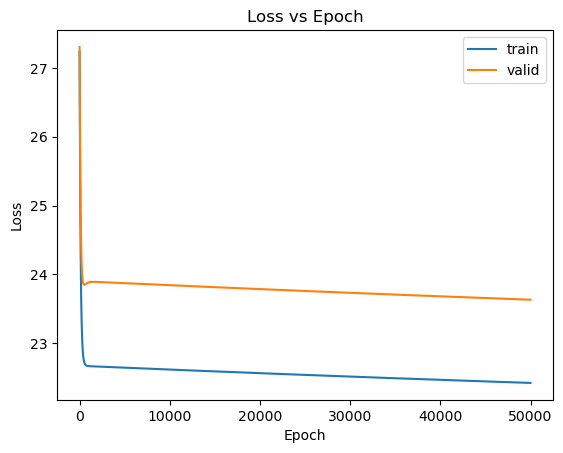

In [19]:
plt.plot(train_loss_tracker[10:], label='train')
plt.plot(valid_loss_tracker[10:], label='valid')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch");
plt.legend();

We can display our final parameters to see how the regression worked.  This will show the weight for each predictor, as well as the bias:

In [20]:
params

[array([[ 0.80671331],
        [ 0.21800533],
        [-0.25312442]]),
 array([[1.63703472]])]

# Test Result
We can also evaluate the algorithm on the test set to measure error:

In [21]:
predictions = forward(params, test_x)
mse(test_y, predictions)

24.3653239581628

In practice, the interactions between neural network layers will be complex enough that you will likely not get to a global minimum.  If the error is higher than you expect, you can try changing the learning rate (lowering it will take longer to converge, but may be more likely to reach a global minimum).  You can also try re-initializing the layer weights and retrying gradient descent.  Usually it is not a huge issue if you reach a local minimum instead of a global minimum, as long as your error is good enough for your application.

# Acknowledgement
* [LInear Regression](https://github.com/VikParuchuri/zero_to_gpt/blob/master/notebooks/linreg/linreg.ipynb) by VikParuchuri